In [1]:
import pandas as pd
import numpy as np

/Users/manasshetty14/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/manasshetty14/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
path="mlpro.xlsx"
data=pd.read_excel(path)

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 11.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Missing Values Check:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Exploratory Data Analysis (EDA):


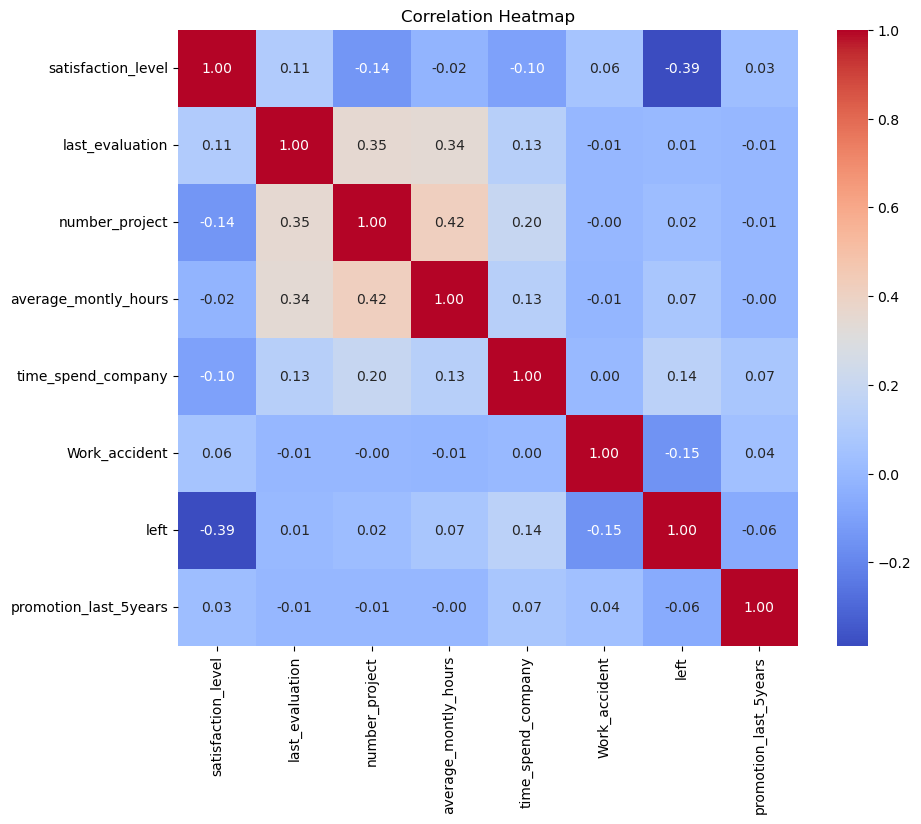

/var/folders/23/yzmkfxwj40s0thm3x2d6mt100000gn/T/ipykernel_22533/233861439.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.labels_


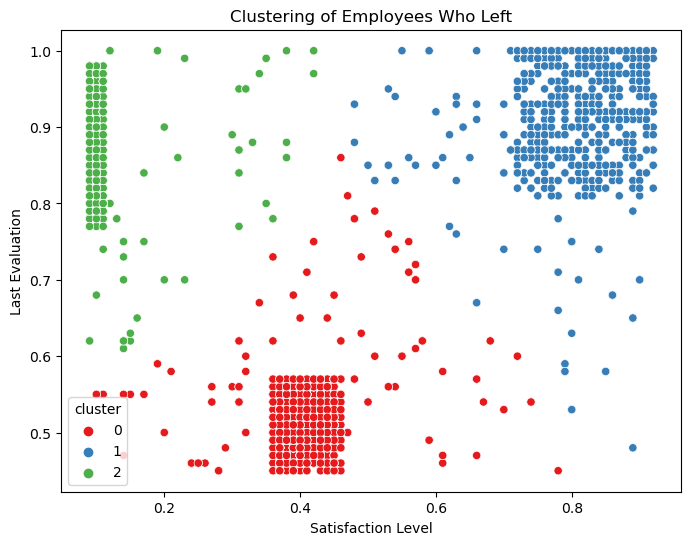


Cross-Validation F1 Score:
Mean: 0.78, Std: 0.01

Model Performance Evaluation:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2323
           1       0.75      0.79      0.77      2249

    accuracy                           0.77      4572
   macro avg       0.77      0.77      0.77      4572
weighted avg       0.77      0.77      0.77      4572


Justification of Evaluation Metrics:
F1 score is chosen as the evaluation metric because it balances precision and recall, which is important in the case of imbalanced classes.

Retention strategies for high-risk employees:
- Offer competitive compensation and benefits
- Provide clear career growth opportunities
- Improve work-life balance
- Address workplace issues identified through employee feedback


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
data = pd.read_excel('mlpro.xlsx')

# Check for missing values
print("Missing Values Check:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis (EDA):")

# Exclude non-numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Clustering employees who left based on satisfaction and evaluation
left_employees = data[data['left'] == 1]
X = left_employees[['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
left_employees['cluster'] = kmeans.labels_

# Visualize the clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set1')
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

# Handle class imbalance using SMOTE
X = data.drop('left', axis=1)
y = data['left']

# Encode categorical features
categorical_cols = ['sales', 'salary']
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

# Scale numerical features
scaler = MinMaxScaler()
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# K-fold cross-validation and model training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')
print('\nCross-Validation F1 Score:')
print(f'Mean: {cv_scores.mean():.2f}, Std: {cv_scores.std():.2f}')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nModel Performance Evaluation:")
print(classification_report(y_test, y_pred))

# Justify the evaluation metrics used
print("\nJustification of Evaluation Metrics:")
print("F1 score is chosen as the evaluation metric because it balances precision and recall, which is important in the case of imbalanced classes.")

# Suggest retention strategies
high_risk_employees = data[(data['left'] == 1) & (data['time_spend_company'] < 3)]
print('\nRetention strategies for high-risk employees:')
print('- Offer competitive compensation and benefits')
print('- Provide clear career growth opportunities')
print('- Improve work-life balance')
print('- Address workplace issues identified through employee feedback')
